 - Rotate the Image 
 - Translate the Image 
 - Blur the Image 
 - Day and Night effect 
 - flip the Image 

In [1]:
import numpy as np
import pandas as pd 
import glob,cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
folderlist = glob.glob("/Users/Satish/Downloads/kaggle-fish/data/*")

In [3]:
filelist = glob.glob(folderlist[0]+"/*")

In [4]:
print filelist[395]
print len(filelist)

/Users/Satish/Downloads/kaggle-fish/data/ALB/img_01809.jpg
1719


In [5]:
# Functions for reading the Image 
def Image_read(image):
    x = cv2.imread(image)
    x = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
    return x

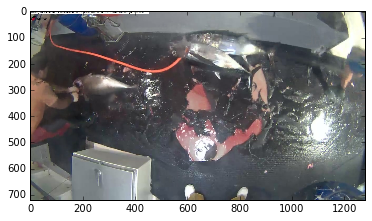

In [24]:
img = Image_read(filelist[200])
plt.imshow(img)
plt.show()

In [25]:
# rotate the Image 
def rotate(image, angle, center=None, scale=1.0):
    (h,w) = image.shape[:2]
    if center is None:
        center =(w/2,h/2)
        M = cv2.getRotationMatrix2D(center,angle,scale)
        rotated = cv2.warpAffine(image,M,(w,h))
    return rotated

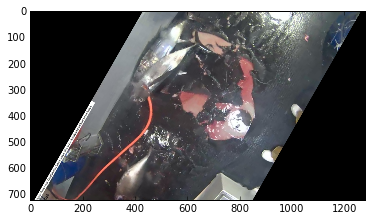

In [26]:
img_rotate = rotate(img,60)
plt.imshow(img_rotate)
plt.show()

In [27]:
def translate(image,x,y):
    M = np.float32([[1, 0, x],[0, 1, y]])
    shifted = cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
    return shifted

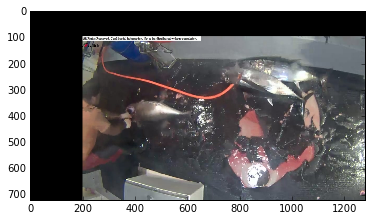

In [28]:
img_translate = translate(img,200,100)
plt.imshow(img_translate)
plt.show()

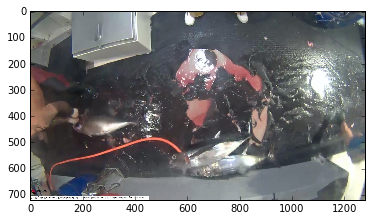

In [29]:
img_flip = cv2.flip(img,0)
plt.imshow(img_flip)
plt.show()

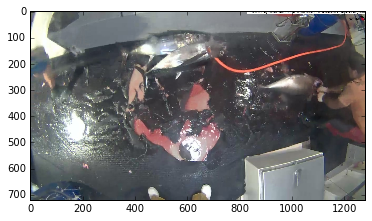

In [30]:
img_flip = cv2.flip(img,1)
plt.imshow(img_flip)
plt.show()

In [31]:
def day_to_night(image):
    arr = image *np.array([0.1,0.2,1.7])
    img = (255*arr/arr.max()).astype(np.uint8)
    return img 

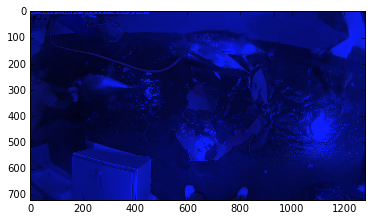

In [32]:
img_d2n = day_to_night(img)
plt.imshow(img_d2n)
plt.show()

In [33]:
np.random.uniform(3, 3, 2)

array([ 3.,  3.])

In [34]:
def shear_image(image,shear = 0.2):
    from skimage import transform 
    afine = transform.AffineTransform(shear = shear)
    modified = transform.warp(image,afine)
    return modified

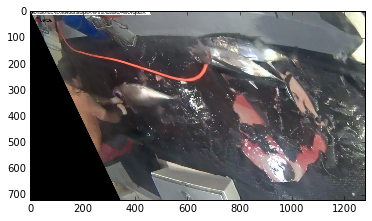

In [35]:
img_shear = shear_image(img,shear=0.5)
plt.imshow(img_shear)
plt.show()

In [36]:
img[:,:,0]

array([[254, 253, 253, ..., 153, 155, 156],
       [255, 253, 254, ..., 154, 155, 156],
       [252, 252, 253, ..., 154, 155, 156],
       ..., 
       [102, 102, 103, ...,  73,  73,  73],
       [102, 102, 103, ...,  73,  73,  73],
       [102, 102, 103, ...,  72,  73,  73]], dtype=uint8)

In [37]:
def bright_image(image):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    h +=60
    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv,cv2.COLOR_HSV2RGB)
    return image

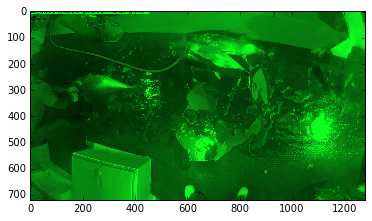

In [38]:
bright_img = bright_image(img_d2n)
plt.imshow(bright_img)
plt.show()

In [53]:
import pandas as pd 
from tqdm import tqdm
# create a dataframe of Image_labels along with Name 
labels = pd.DataFrame()
folderlist = glob.glob("/Users/Satish/Downloads/kaggle-fish/data/*")

for i in tqdm(range(len(folderlist))):
    filelist = glob.glob(folderlist[i]+"/*")
    for f in range(len(filelist)):
        index = filelist[f].rsplit("/")[-2]+"/"+filelist[f].rsplit("/")[-1]
        level = filelist[f].rsplit("/")[-2]
        labels = labels.append({"index":index,"level":level}, ignore_index=True)
        
labels = labels.set_index(["index"])

100%|██████████| 8/8 [00:07<00:00,  1.02it/s]


In [54]:
labels.tail()

,level
index,
YFT/img_07853.jpg,YFT
YFT/img_07854.jpg,YFT
YFT/img_07891.jpg,YFT
YFT/img_07901.jpg,YFT
YFT/img_07911.jpg,YFT


In [55]:
#save the dataframe to local file
labels.to_csv("labels.csv",sep=",")